In [1]:
#!pip install psycopg2


In [9]:
import psycopg2
import pandas as pd
import csv

### verify the conexion
try:
    # Connect to the database
    conn = psycopg2.connect(
        host="pg.ujueta.com",
        port="5432",
        user="consultoria",
        password="LmKTXJBXya!14]f9!2k]",
        database="postgres",
    )
except psycopg2.Error as e:
    print("Error connecting to the database:")
    print(e)
else:
    print("Connection established successfully")

Connection established successfully


In [10]:

### ventas diario apiladas
def export_forecast_to_csv():
    try:
        # connect to the database
        conn = psycopg2.connect(
            host="pg.ujueta.com",
            port="5432",
            user="consultoria",
            password="LmKTXJBXya!14]f9!2k]",
            database="postgres",
        )

        # create cursor
        with conn.cursor() as cur:

            # ececute a sql query

            cur.execute("SELECT * FROM forecast.ventas_diario")

            # fetch the results
            results = cur.fetchall()

            # open a file in the downloads folder

            with open(
                "/home/usuario/Escritorio/Consultorias_Empresariales/Ujueta/Datos/outputs3.csv",
                "w",
                newline="",
            ) as f:
                # create a csv writer
                writer = csv.writer(f)

                # write the column names
                writer.writerow([col[0] for col in cur.description])

                # write the query results
                writer.writerows(results)
    except Exception as e:
        print(f"An error ocurred: {e}")
    finally:
        # close the cursor and connection
        if conn:
            conn.close()


# Call the function to export data to csv
export_forecast_to_csv()


In [24]:
### manipulate data

import pandas as pd

# carga de datas
data = pd.read_csv(
    "/home/usuario/Escritorio/Consultorias_Empresariales/Ujueta/Datos/outputs3.csv"
)
# convertir en dataframe
df = pd.DataFrame(data)
df.head()

,docdate,codigo_articulo,cantidad
0,2022-01-03,AUACALR4,1
1,2022-01-03,AUACCH1,5
2,2022-01-03,AUACPB400,1
3,2022-01-03,AUACRIM4F,5
4,2022-01-03,AUACSH1000,3


In [2]:
df.shape

(90156, 3)

In [3]:
import pandas as pd

def sumarizar_a_mensual(df, fecha_col, suma_col, agrupar_por=None):
    """
    Función para sumarizar datos diarios a un nivel mensual.

    Parámetros:
    ----------
    df : pd.DataFrame
        El DataFrame de entrada con los datos a procesar.
    fecha_col : str
        Nombre de la columna que contiene las fechas.
    suma_col : str
        Nombre de la columna cuyos valores se desean sumarizar.
    agrupar_por : list, optional
        Lista de columnas adicionales para agrupar (por defecto es None).
    
    Retorna:
    -------
    pd.DataFrame
        DataFrame con los datos agregados a nivel mensual.
    """
    # Asegurar que la columna de fecha esté en formato datetime
    df[fecha_col] = pd.to_datetime(df[fecha_col], errors='coerce')
    
    # Filtrar filas con fechas válidas
    df = df.dropna(subset=[fecha_col])
    
    # Crear la clave de agrupación mensual
    df['date'] = df[fecha_col].dt.to_period('M').dt.to_timestamp()

    # Configurar las columnas para agrupar
    group_cols = ['date'] + (agrupar_por if agrupar_por else [])

    # Realizar la agrupación y sumarización
    resultado = (
        df.groupby(group_cols, as_index=False)[suma_col]
        .sum()
    )

    return resultado


In [25]:
# List of SKUs to filter
selected_skus = [
                   'AUAC265', 'AUAC3-4-1', 'AUAC4010', 'AUACAC24NE600', 'AUACAC24NE', 'AUACAE15', 'AUACAE25', 'AUACAF24Li', 'AUACAF31C',
                   'AUACAH45', 'AUACAL3900U', 'AUACALH2', 'AUACALK4', 'AUACALS4', 'AUACAN4275', 'AUACAP40', 'AUACAR10SC901', 'AUACAR10SH', 'AUACAR200',
                    'AUACAR380', 'AUACAT42', 'AUACAT63', 'AUACAVANTI6000Z', 'AUACBD1100','AUACBD1522', 'AUACBD850', 'AUACBL05', 'AUACBOOM02',
                   'AUACBOOM04F', 'AUACBOOM06T', 'AUACCH1', 'AUACCRAB02','AUACCRAB03', 'AUACDG1224', 'AUACEG250', 'AUACEG500', 'AUACEG501', 'AUACEL12',
                    'AUACFC350', 'AUACFC351', 'AUACFENIX600', 'AUACFENIX601', 'AUACFEX10', 'AUACFL85265', 'AUACFS05', 'AUACFX1000', 'AUACGC02',
                    'AUACHR42', 'AUACHULK1500', 'AUACHULK400S', 'AUACHULK450', 'AUACHULK750','AUACHULK950', 'AUACIN624', 'AUACKCP200C', 'AUACKCP201R',
                     'AUACKCP250R', 'AUACKCP251C', 'AUACKCP300C', 'AUACKCP301R', 'AUACKCP350C', 'AUACKCP351R', 'AUACKCP375C', 'AUACKCP376R', 'AUACKCP400C',
                     'AUACKCP401R', 'AUACKCP450R', 'AUACKCP451C', 'AUACKCP490C', 'AUACKCP491R', 'AUACKCP501R', 'AUACKCP551R', 'AUACKCP575R', 'AUACKCP801R',
                     'AUACKCP850R', 'AUACKCP875R', 'AUACKCP900R', 'AUACKCP950R', 'AUACKCP975R', 'AUACKH100K', 'AUACKH120K', 'AUACKH140K', 'AUACKH160K', 'AUACKH55K',
                     'AUACKH60K', 'AUACKH70K', 'AUACKH80K', 'AUACKSH20', 'AUACLD500', 'AUACMN20', 'AUACMTD224', 'AUACMTD624', 'AUACOP3090W', 'AUACOWL504',
                     'AUACOWL608', 'AUACRC4SC', 'AUACRCBLT3', 'AUACRIM4Z', 'AUACRP120','AUACRT2415U', 'AUACRT3FX', 'AUACRT4SC', 'AUACSB4', 'AUACSB9',
                     'AUACSC1800', 'AUACSC901', 'AUACSLB220', 'AUACSPRING35L', 'AUACSPRING35R', 'AUACSPRING45L', 'AUACSPRING45R', 'AUACSPRING50L', 'AUACSPRING50R',
                     'AUACSPRING55L', 'AUACSPRING55R', 'AUACSPRING60L', 'AUACSPRING60R', 'AUACSPRING70L', 'AUACSPRING70R','AUACSPRING80L', 'AUACSPRING80R',
                     'AUACV515', 'AUACVIPER100', 'AUELCR4301', 'AUELEE16', 'AUELEP100240', 'AUELMC12', 'AUELMC3', 'AUELME611', 'AUELME624DC', 'AUELME811',
                     'AUELPA42', 'AUELSL3000L', 'AUELSL5000', 'AUELSL5500L', 'HEELAG114', 'HEELAG1420', 'HEELAG181', 'HEELAG230', 'HEELAIRKIT20', 'HEELBM3514',
                     'HEELBM5016', 'HEELBV04', 'HEELBV05', 'HEELBV06', 'HEELCA1012D','HEELCA2542D', 'HEELCA5035', 'HEELCA6256', 'HEELCINPA30410', 'HEELCINPU30410',
                     'HEELCS1425', 'HEELCS1427', 'HEELDH1506', 'HEELDH164515', 'HEELDH2810', 'HEELDH4515', 'HEELDH7531', 'HEELEBA111630', 'HEELEBA11850',
                     'HEELEBA1230', 'HEELEBA1250', 'HEELEBA130', 'HEELEBA131630', 'HEELEBA13850','HEELEBA150', 'HEELEBA3430', 'HEELEBA3450', 'HEELEBA5830',
                     'HEELEBA5850', 'HEELEBA7830', 'HEELEBA7850', 'HEELEBA91630', 'HEELEPBA634C', 'HEELEPBA634L', 'HEELJS750', 'HEELMS1018', 'HEELMS1021S',
                     'HEELMT180KIT','HEELPS350', 'HEELPW2482', 'HEELRD1390', 'HEELRM2604', 'HEELRM3209','HEELRM4210', 'HEELRT1512', 'HEELSP500', 'HEELTA1100',
                     'HEELTA1500', 'HEELTA375', 'HEELTA550', 'HEELTA750', 'HEELTS255','HEELXB0220', 'HEELXB0420', 'HEELXB0520', 'HEELXBEA20', 'HEELXBTP20','HEELXCB20',
                     'HEELXID19', 'HEELXIW20', 'HEFUBFCD12', 'HEFUBFCD21','HEFUCBFCD12', 'HEFUCBFCD21', 'HEFUFCS2511', 'HEFUFDH1320', 'HEFUFHG18',
                     'HEFUFPS25', 'HEFUFRM13030', 'HEFUFRM7024', 'MADUDG121-A', 'MADUDG123-A', 'MADUDG23I', 'MADUDG301-A', 'MADUDG401I', 'MADUDG701',
                     'MAEL2G100', 'MAEL2G10I', 'MAEL2G13', 'MAEL2G25', 'MAEL2G40', 'MAEL2G65', 'MAEL2G80', 'MAEL2G950', 'MAELGPW2515', 'SOELAT2610254M',
                     'SOELAT2635504M', 'SOELCSVM500IP', 'SOELCSVM500OP','SOELCSVM750', 'SOELCSVM760', 'SOELCSVM820', 'SOELCSVM830', 'SOELKITSI7160XP',
                     'SOELPES6300', 'SOELPMS6505', 'SOELRAFC208', 'SOELRAFC209', 'SOELREPSI8250MG-R11', 'SOELREPSI8250MG-R12', 'SOELRSF0810A', 'SOELRSF0810B',
                     'SOELRSF1012', 'SOELRSS0608A', 'SOELRSS0608B', 'SOELRSS0910A', 'SOELRSS0910B', 'SOELRSS1012B', 'SOELSI6160MDV', 'SOELSI6200MDV',
                     'SOELSI7160XP', 'SOELSI7175XP', 'SOELSI7200XP', 'SOELSI8225AL', 'SOELSI8225XP', 'SOELSI8300MG', 'SOELSI9210DT', 'SOELSI9220MP',
                     'SOELSI9250DV', 'SOELSI9300DV', 'SOELSI9500MP', 'SOELSIC40DV', 'SOELSIC45DVP', 'SOFUFW121', 'SOFUFW131M', 'SOFUFW161M', 'SOFUFW185',
                     'SOFUFW205CEL', 'SOFUFW255P', 'SOFUFW257', 'SOFUFW50', 'SOFUFW81', 'SOFUFW83', 'SOFUFWA4011', 'SOFUFWA4012', 'SOFUFWA4013',
                     'SOFUFWA4014', 'SOSWC1-620', 'SOSWC1-669', 'SOSWC1-921', 'SOSWC1-931', 'SOSWC1-941', 'SOSWC6-603', 'SOSWG1-110', 'SOSWG1-111',
                     'SOSWG1-112', 'SOSWG1-114', 'SOSWG2-216', 'SOSWG2-217', 'SOSWG3-311', 'SOSWG3-312', 'SOSWG3-313', 'SOSWG3-314', 'SOSWG3-316', 'SOSWG3-COOL',
                     'SOSWM1-113', 'SOSWM1-117', 'SOSWM1-122', 'SOSWM1-125','SOSWM2-210', 'SOSWM2-211', 'SOSWM2-212','SOSWM2-214', 'SOSWM2-215', 'SOSWM2-217',
                     'SOSWM2-218', 'SOSWM2-229', 'SOSWM2-235', 'SOSWM2-236', 'SOSWM2-237','SOSWM2-238', 'SOSWM2-245', 'SOSWM2-246', 'SOSWM2-249', 'SOSWM2-251',
                     'SOSWM2-252', 'SOSWM2-253', 'SOSWM2-254', 'SOSWM2-257', 'SOSWM2-265', 'SOSWM2-272', 'SOSWM2-274', 'SOSWM2-311', 'SOSWM2-312',
                     'SOSWM2-320', 'SOSWM2-321', 'SOSWM2-324', 'SOSWM2-325', 'SOSWM2-328', 'SOSWM3-215', 'SOSWM3-225', 'SOSWM3-316', 'SOSWM3-325',
                     'SOSWM3-326', 'SOSWM3-327', 'SOSWP1-330','SOSWP1-340', 'SOSWP1-440', 'SOSWP2-409', 'SOSWP2-410', 'SOSWP2-411', 'SOSWP2-412',
                     'SOSWP2-413', 'SOSWP2-414', 'SOSWP2-417', 'SOSWP2-418', 'SOSWP2-420', 'SOSWP2-421', 'SOSWP2-424', 'SOSWP2-425', 'SOSWP2-427',
                     'SOSWP2-510', 'SOSWP2-511', 'SOSWP2-512', 'SOSWP2-515', 'SOSWP2-518', 'SOSWPMSW02', 'SOSWREPM1-122E', 'SOSWSWA2040N', 'SOSWSWA2650',
                     'SOSWSWA2850', 'SOSWSWA3250', 'SOSWSWC1000', 'SOSWSWC440N', 'SOSWSWC690', 'SOSWSWP3060', 'SOSWSWT2033', 'SOSWSWT2035', 'SOSWSWT2045',
                     'SOSWSWT3545A', 'SOSWSWW2060N', 'SOSWSWW2550', 'SOSWSWW2760', 'SOSWSWW3552', 'SOSWSWW4070MV', 'SOSWSWW5070MV', 'SOSWT1-111', 'SOSWT1-112', 'SOSWT1-115'
]

# Filter the dataset
filtered_df = df[df['codigo_articulo'].isin(selected_skus)]

In [26]:
print(len(selected_skus))

380


In [6]:
print(filtered_df)

          docdate codigo_articulo  cantidad
1      2022-01-03         AUACCH1         5
5      2022-01-03      AUELCR4301         1
7      2022-01-03         AUELMC3         1
9      2022-01-03       HEELAG114        14
12     2022-01-03       HEELAG181         2
...           ...             ...       ...
90148  2024-12-09      SOSWP2-515         5
90151  2024-12-09      SOSWP2-518         3
90153  2024-12-09    SOSWSWA2040N         2
90154  2024-12-09     SOSWSWA2650         2
90155  2024-12-09   SOSWSWW5070MV         0

[51212 rows x 3 columns]


In [7]:
data_lowdda = filtered_df[filtered_df['docdate'] >= '2021-01-01']
data_lowdda

,docdate,codigo_articulo,cantidad
1,2022-01-03,AUACCH1,5
5,2022-01-03,AUELCR4301,1
7,2022-01-03,AUELMC3,1
9,2022-01-03,HEELAG114,14
12,2022-01-03,HEELAG181,2
...,...,...,...
90148,2024-12-09,SOSWP2-515,5
90151,2024-12-09,SOSWP2-518,3
90153,2024-12-09,SOSWSWA2040N,2
90154,2024-12-09,SOSWSWA2650,2


In [27]:
# series con muy pocos valores para pasar por los modelos--> Buscar una forma de hacer pronosticos: sma u otros
low_cases = ['AUACAVANTI6000Z', 'AUACBOOM04F', 'AUACFS05', 'AUACHULK1500', 'AUACKCP900R', 'AUACKH160K',
            'AUACAC24NE600', 'AUACALK4', 'AUACBOOM02', 'AUACCRAB03', 'AUACHULK400S', 'AUACKCP501R',
            'AUACKCP801R', 'AUACKH60K', 'AUACKH80K', 'AUACKSH20', 'AUACMTD224', 'AUACRC4SC', 
             'AUACSPRING35L', 'AUACSPRING35R', 'AUACSPRING45L', 'AUACSPRING45R', 'AUACSPRING50L', 'AUACSPRING50R',
            'HEELEBA13850', 'MAEL2G80', 'SOELREPSI8250MG-R11', 'SOELREPSI8250MG-R12', 'SOELRSF1012', 'SOELRSS0608A',
            'SOFUFWA4011', 'SOSWG3-312', 'SOSWM1-113', 'SOSWM2-218', 'SOSWM2-272', 'SOSWM2-320',
            'SOSWM2-321', 'SOSWM2-324', 'SOSWM2-325', 'SOSWM2-328', 'SOSWP2-421', 'SOSWP2-424', 'SOSWSWW5070MV', 
            'HEELEBA11850', 'HEELEPBA634L', 'SOELRSS0910A', 'SOELRSS0910B', 'SOELRSS1012B', 'SOELSI9500MP',
            'SOELSIC45DVP', 'SOSWG3-316', 'SOSWG3-COOL', 'SOSWM1-125', 'SOSWM2-217', 'SOSWM2-249',
            'SOSWM2-253', 'SOSWM2-257', 'SOSWP1-340', 'SOSWP2-420', 'SOSWP2-425', 'SOSWP2-427',
            'SOSWREPM1-122E', 'SOSWSWT3545A', 'SOSWSWW3552', 'SOSWSWW4070MV', 'AUACRT4SC', 'AUACSPRING55L', 
             'HEELCS1427', 'HEELEBA150', 'HEELEBA3450', 'HEELEBA5850', 'HEELEBA7830', 'HEELEBA7850',
             'MADUDG123-A', 'SOELRSF0810A', 'SOELRSF0810B', 'SOELRSS0608B',
            'SOELSI8225XP', 'SOSWG3-314', 'SOSWM2-236', 'SOSWM2-238', 'SOSWM2-246', 'SOSWM2-274', 'SOSWSWT2033',
            'AUACAF24Li', 'AUACBOOM06T', 'AUACMTD624', 'AUACSC1800', 'AUACSPRING55R', 'AUACSPRING60L', 'AUACSPRING60R', 
             'AUACSPRING70L', 'AUACSPRING70R', 'AUACSPRING80L', 'AUACSPRING80R', 'AUELEP100240',
            'AUACSPRING60R', 'AUACSPRING70L', 'AUACSPRING70R', 'AUACSPRING80L', 'AUACSPRING80R', 'AUELEP100240', 'HEELRD1390',
            'AUAC4010', 'AUACAE15', 'AUACAF31C', 'AUACAP40', 'AUACAR10SC901', 'AUACAT63', 'AUACEG501', 'AUACFENIX601', 
             'AUACFEX10', 'AUACGC02', 'AUACKCP201R', 'AUACKCP250R', 'AUACKCP251C', 'AUACKCP351R', 'AUACKCP375C', 'AUACKCP376R', 
             'AUACKCP401R', 'AUACKCP450R', 'AUACKCP451C', 'AUACKCP490C', 'AUACKCP551R', 'AUACKCP575R', 'AUACKCP850R', 
             'AUACKCP875R', 'AUACKCP950R', 'AUACKCP975R', 'AUACKH100K', 'AUACLD500', 'AUACSB4', 'AUACSB9',
            'AUACSLB220', 'AUACVIPER100', 'AUELME624DC', 'AUELSL3000L', 'AUELSL5000', 'AUELSL5500L',
            'HEELDH2810', 'HEELDH4515', 'HEELEBA1230', 'HEELEBA1250', 'HEELEBA130', 'HEELEBA131630', 
             'HEELEBA3430', 'HEELEBA5830', 'HEELEPBA634C', 'HEELRM3209', 'HEELXB0520', 'SOSWG3-311',
            'SOSWG3-313', 'SOSWM1-117', 'SOSWM2-229', 'SOSWP1-330', 'SOSWP2-412', 'SOSWP2-413', 'SOSWP2-510', 
             'SOSWSWA2850', 'SOSWSWC1000', 'SOSWSWW2760','HEELBM5016', 'HEELCA5035', 'HEELDH1506',
             'HEELDH7531', 'HEELEBA111630', 'HEELEBA91630', 'HEELMT180KIT', 'HEELRM2604', 'HEELRM4210', 
             'HEELXBTP20', 'HEFUBFCD12', 'HEFUCBFCD12', 'HEFUFRM7024', 'MADUDG121-A', 'MADUDG23I', 'MADUDG401I', 
             'SOELCSVM500IP', 'SOELCSVM820', 'SOELCSVM830', 'SOFUFWA4014', 'SOSWC1-921', 'SOSWC1-931', 
             'SOSWC1-941', 'SOSWG1-112', 'SOSWG2-216', 'SOSWM2-210', 'SOSWM2-214', 'SOSWM2-215', 
             'SOSWM2-312', 'SOSWP2-414', 'SOSWP2-418', 'SOSWSWT2035', 'SOSWT1-112']      

In [36]:
low_dda = data_lowdda[~data_lowdda['codigo_articulo'].isin(low_cases)]
low_dda

,docdate,codigo_articulo,cantidad
1,2022-01-03,AUACCH1,5
5,2022-01-03,AUELCR4301,1
7,2022-01-03,AUELMC3,1
9,2022-01-03,HEELAG114,14
12,2022-01-03,HEELAG181,2
...,...,...,...
90145,2024-12-09,SOSWP2-511,8
90148,2024-12-09,SOSWP2-515,5
90151,2024-12-09,SOSWP2-518,3
90153,2024-12-09,SOSWSWA2040N,2


In [37]:
#========================================================================================================================================
# Ajuste de Datos para statsforecast
#========================================================================================================================================

#-- Dato de ejemplo para función

def data_sf(df, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo'):
    df_m = df[[date, y, unique_id]]
    df_m.rename(columns={date : 'ds', y :'y', unique_id: 'unique_id'}, inplace=True)
  
    return df_m

df_m = data_sf(low_dda, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo')
df_m
df_m.info()




<class 'pandas.core.frame.DataFrame'>
Index: 45121 entries, 1 to 90154
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ds         45121 non-null  object
 1   y          45121 non-null  int64 
 2   unique_id  45121 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [38]:
print(df_m.head())  # Preview the data
print(df_m.isnull().sum())  # Check for missing values
#print(df_m.describe())  # Summarize data to detect anomalies


            ds   y   unique_id
1   2022-01-03   5     AUACCH1
5   2022-01-03   1  AUELCR4301
7   2022-01-03   1     AUELMC3
9   2022-01-03  14   HEELAG114
12  2022-01-03   2   HEELAG181
ds           0
y            0
unique_id    0
dtype: int64


In [12]:
#========================================================================================================================================
# Colección de modelos
#========================================================================================================================================
#========================================================================================================================================
# Colección de modelos
#========================================================================================================================================
from statsforecast import StatsForecast #- Para instanciar los  modelos
from statsforecast.models import Naive
from functools import partial
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mape, mase, mse, smape
from statsforecast.models import (
    #AutoARIMA,
    #AutoETS,
    #HoltWinters,
    ADIDA,
    CrostonClassic as Croston, 
    IMAPA,
    TSB,
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    Naive,
    SeasonalNaive,
    #Theta,
    WindowAverage,
    #Holt,
    #CrostonOptimized,
)

#-- Parametros

# Número de dias en el futuro a pronosticar
horizon = 60
# Ventana estacional: es 7 porque tenemos datos diarios
season_length = 7
# El número de meses que el modelo usará para hacer el forecast 
window_size = 10

# Lista de modelos a evaluar
models = [
    #AutoARIMA(season_length=season_length),
    #AutoETS(season_length=season_length),
    #HoltWinters(season_length=season_length),
    ADIDA(),   # could produce zero division
    Croston(),  # could produce zero division
    IMAPA(),   # could produce zero division
    TSB(alpha_d = 0.2, alpha_p = 0.2),
    HistoricAverage(),
    #DOT(season_length=season_length),
    Naive(),
    SeasonalNaive(season_length=season_length),
    #Theta(),  # could produce zero division
    WindowAverage(window_size=7),  # Adjust `window_size` as needed
    #Holt(),
    #CrostonOptimized()
]

In [13]:
# StatsForecast.plot(df_m)

# Instanciando StatsForecast como sf
sf = StatsForecast( 
    models=models,
    freq='D', #MS
    n_jobs=-1,
)


In [14]:
from functools import partial
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mape, mase, mse, smape

try:
    crossvaldation_df = sf.cross_validation(
        df=df_m,
        h=horizon,
        step_size=horizon,
        n_windows=1
    )
except ZeroDivisionError as e:
    print(f"Error: {e}")

/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [36]:

'''
# Cross Validation
crossvaldation_df = sf.cross_validation(
    df=df_m,
    h=horizon,
    step_size=horizon,
    n_windows=1
)

'''

'\n# Cross Validation\ncrossvaldation_df = sf.cross_validation(\n    df=df_m,\n    h=horizon,\n    step_size=horizon,\n    n_windows=1\n)\n\n'

In [15]:
def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['unique_id', 'ds', 'cutoff', 'y'], errors='ignore').columns.tolist()
    evals = []
    # Calculate loss for every unique_id and cutoff.    
    for cutoff in df['cutoff'].unique():
        eval_ = evaluate(df[df['cutoff'] == cutoff], metrics=[metric], models=models)
        evals.append(eval_)
    evals = pd.concat(evals)
    evals = evals.groupby('unique_id').mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

evaluation_df = evaluate_cross_validation(crossvaldation_df.reset_index(drop=False), smape)
evaluation_df.head(22)

,ADIDA,CrostonClassic,IMAPA,TSB,HistoricAverage,Naive,SeasonalNaive,WindowAverage,best_model
unique_id,,,,,,,,,
AUAC265,0.436583,0.438789,0.436583,0.424797,0.445316,0.276519,0.447245,0.469978,Naive
AUAC3-4-1,0.572110,0.572110,0.572110,0.542113,0.614225,0.520019,0.439882,0.529189,SeasonalNaive
AUACAC24NE,0.377454,0.378224,0.377454,0.381720,0.425863,0.386984,0.349113,0.371342,SeasonalNaive
AUACAE25,0.367063,0.352484,0.367063,0.365109,0.412763,0.329127,0.457083,0.483685,Naive
AUACAH45,0.443911,0.443919,0.443911,0.359680,0.499427,0.364648,0.338007,0.331994,WindowAverage
AUACAL3900U,0.516959,0.516192,0.516959,0.538759,0.513520,0.333342,0.466004,0.572159,Naive
AUACALH2,0.544728,0.544735,0.544728,0.499629,0.575302,0.442699,0.497659,0.454427,Naive
AUACALS4,0.520664,0.520664,0.520664,0.538023,0.472449,0.442474,0.569326,0.539778,Naive
AUACAN4275,0.289757,0.289769,0.289757,0.271609,0.350114,0.267910,0.274073,0.273505,Naive


In [16]:
#--- Selección del mejor modelo
fcst_df = sf.forecast(df=df_m, 
                      h=horizon, 
                      ## level=[90]
                     )
fcst_df.head(10)

/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,ADIDA,CrostonClassic,IMAPA,TSB,HistoricAverage,Naive,SeasonalNaive,WindowAverage
unique_id,,,,,,,,,
AUAC265,2024-12-10,5.391449,5.391533,5.391449,6.689824,3.87037,19.0,10.0,6.857143
AUAC265,2024-12-11,5.391449,5.391533,5.391449,6.689824,3.87037,19.0,6.0,6.857143
AUAC265,2024-12-12,5.391449,5.391533,5.391449,6.689824,3.87037,19.0,7.0,6.857143
AUAC265,2024-12-13,5.391449,5.391533,5.391449,6.689824,3.87037,19.0,4.0,6.857143
AUAC265,2024-12-14,5.391449,5.391533,5.391449,6.689824,3.87037,19.0,1.0,6.857143
AUAC265,2024-12-15,5.391449,5.391533,5.391449,6.689824,3.87037,19.0,1.0,6.857143
AUAC265,2024-12-16,5.391449,5.391533,5.391449,6.689824,3.87037,19.0,19.0,6.857143
AUAC265,2024-12-17,5.391449,5.391533,5.391449,6.689824,3.87037,19.0,10.0,6.857143
AUAC265,2024-12-18,5.391449,5.391533,5.391449,6.689824,3.87037,19.0,6.0,6.857143


/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


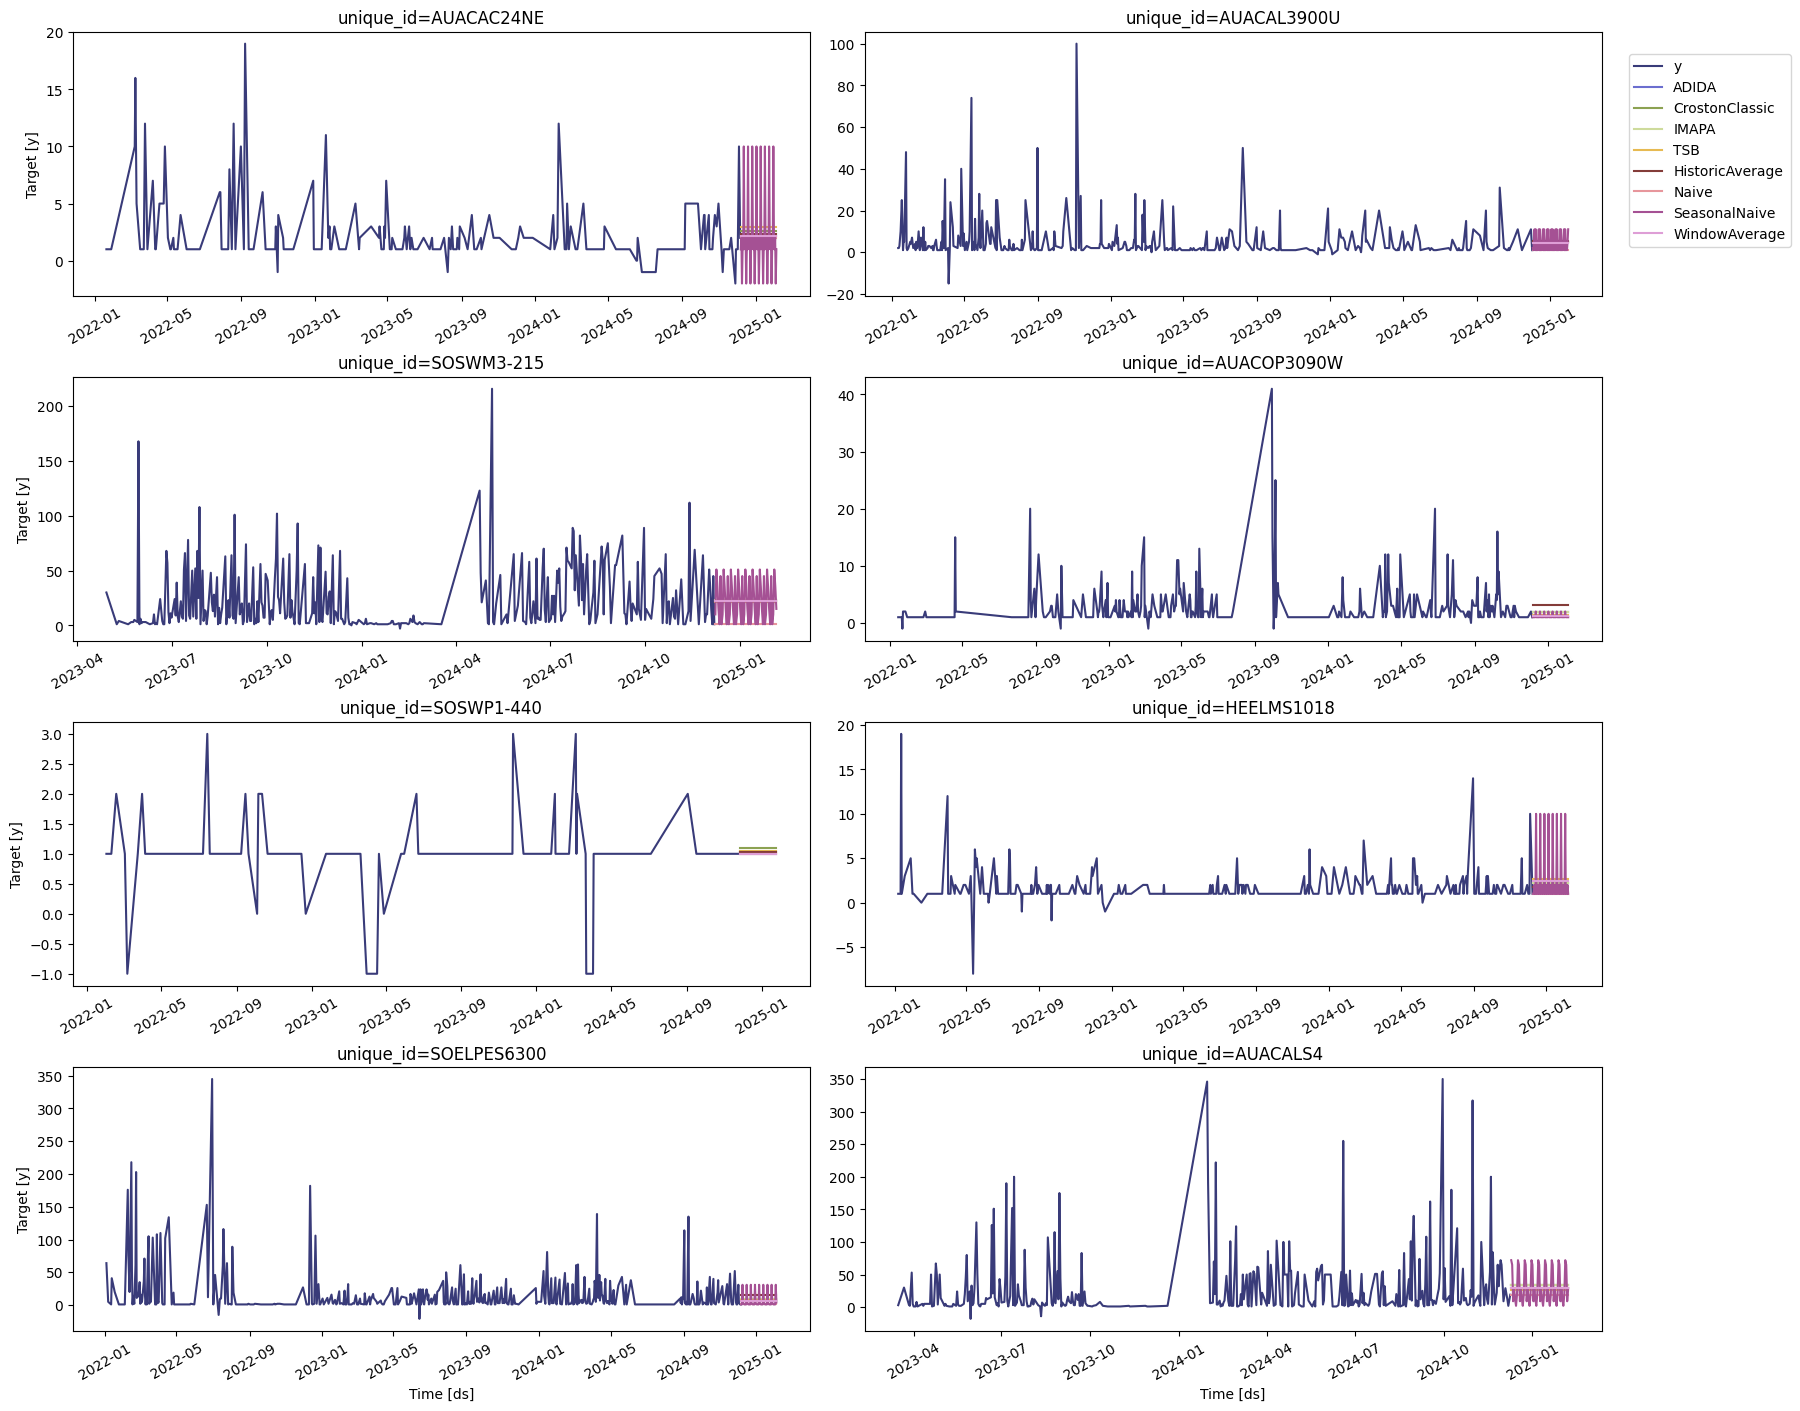

In [17]:
sf.plot(df_m,fcst_df)

In [18]:
'''
def get_best_model_forecast(forecasts_df, evaluation_df):
    col_bm = evaluation_df['best_model'].values[0]
    df = forecasts_df[col_bm] # Wide to long 
    df = df.reset_index(drop=False)
    df.columns = ['unique_id', 'best_model']
    return df

prod_forecasts_df = get_best_model_forecast(forecasts_df = fcst_df, 
                                            evaluation_df = evaluation_df)
prod_forecasts_df

'''

"\ndef get_best_model_forecast(forecasts_df, evaluation_df):\n    col_bm = evaluation_df['best_model'].values[0]\n    df = forecasts_df[col_bm] # Wide to long \n    df = df.reset_index(drop=False)\n    df.columns = ['unique_id', 'best_model']\n    return df\n\nprod_forecasts_df = get_best_model_forecast(forecasts_df = fcst_df, \n                                            evaluation_df = evaluation_df)\nprod_forecasts_df\n\n"

In [17]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    # Clean and standardize column names
    forecasts_df.columns = forecasts_df.columns.str.strip().str.lower()
    evaluation_df['best_model'] = evaluation_df['best_model'].str.strip().str.lower()
    
    # Reset index to ensure 'unique_id' is a column
    forecasts_df = forecasts_df.reset_index()
    
    # Merge evaluation_df with forecasts_df
    merged_df = evaluation_df.merge(forecasts_df, on='unique_id', how='left')
    
    rows = []
    for _, row in merged_df.iterrows():
        best_model = row['best_model']
        
        # Validate best_model column
        if best_model not in forecasts_df.columns:
            raise KeyError(f"Model '{best_model}' not found in forecasts_df columns: {forecasts_df.columns.tolist()}")
        
        # Append the forecast value for the best model
        rows.append({'unique_id': row['unique_id'], 'ds': row['ds'], 'best_model': row[best_model]})
    
    # Convert to a dataframe
    result_df = pd.DataFrame(rows)
    return result_df

# Example usage
prod_forecasts_df = get_best_model_forecast(forecasts_df=fcst_df, evaluation_df=evaluation_df)

prod_forecasts_df

,unique_id,ds,best_model
0,AUAC265,2024-12-10,19.000000
1,AUAC265,2024-12-11,19.000000
2,AUAC265,2024-12-12,19.000000
3,AUAC265,2024-12-13,19.000000
4,AUAC265,2024-12-14,19.000000
...,...,...,...
11515,SOSWT1-115,2025-01-31,1.208633
11516,SOSWT1-115,2025-02-01,1.208633
11517,SOSWT1-115,2025-02-02,1.208633
11518,SOSWT1-115,2025-02-03,1.208633


In [18]:
prod_forecasts_df[prod_forecasts_df['unique_id'] == 'AUAC265']

,unique_id,ds,best_model
0,AUAC265,2024-12-10,19.0
1,AUAC265,2024-12-11,19.0
2,AUAC265,2024-12-12,19.0
3,AUAC265,2024-12-13,19.0
4,AUAC265,2024-12-14,19.0
5,AUAC265,2024-12-15,19.0
6,AUAC265,2024-12-16,19.0
7,AUAC265,2024-12-17,19.0
8,AUAC265,2024-12-18,19.0
9,AUAC265,2024-12-19,19.0


In [19]:
# monthly summarization 
df = sumarizar_a_mensual(
    prod_forecasts_df, 
    fecha_col='ds', 
    suma_col='best_model', 
    agrupar_por=['unique_id']
)

print(df)

          date     unique_id  best_model
0   2024-03-01   AUACKCP491R   24.000000
1   2024-03-01    AUACKH140K  172.714292
2   2024-04-01   AUACKCP301R   11.000000
3   2024-04-01   AUACKCP350C   14.000000
4   2024-04-01   AUACKCP491R   30.000000
..         ...           ...         ...
550 2025-02-01   SOSWSWT2045    4.000000
551 2025-02-01  SOSWSWW2060N    8.987159
552 2025-02-01   SOSWSWW2550    2.000000
553 2025-02-01    SOSWT1-111    2.000000
554 2025-02-01    SOSWT1-115    4.834532

[555 rows x 3 columns]


In [20]:
df[df['unique_id'] == 'AUAC265']

,date,unique_id,best_model
62,2024-12-01,AUAC265,418.0
242,2025-01-01,AUAC265,589.0
421,2025-02-01,AUAC265,133.0


In [21]:
df[df['unique_id'] == 'SOSWT1-111']
 

,date,unique_id,best_model
240,2024-12-01,SOSWT1-111,56.0
419,2025-01-01,SOSWT1-111,62.0
553,2025-02-01,SOSWT1-111,2.0


In [22]:
dt = pd.pivot_table(df, index=['date'], columns=['unique_id'], values=['best_model'])
print(dt)

           best_model                                                     \
unique_id     AUAC265 AUAC3-4-1 AUACAC24NE AUACAE25 AUACAH45 AUACAL3900U   
date                                                                       
2024-03-01        NaN       NaN        NaN      NaN      NaN         NaN   
2024-04-01        NaN       NaN        NaN      NaN      NaN         NaN   
2024-05-01        NaN       NaN        NaN      NaN      NaN         NaN   
2024-06-01        NaN       NaN        NaN      NaN      NaN         NaN   
2024-07-01        NaN       NaN        NaN      NaN      NaN         NaN   
2024-08-01        NaN       NaN        NaN      NaN      NaN         NaN   
2024-09-01        NaN       NaN        NaN      NaN      NaN         NaN   
2024-10-01        NaN       NaN        NaN      NaN      NaN         NaN   
2024-11-01        NaN      44.0        NaN     88.0      NaN         NaN   
2024-12-01      418.0     393.0       47.0    124.0    150.0        29.0   
2025-01-01  

In [114]:
dt.shape

(12, 192)

In [40]:
dt.to_csv('forecast_low.csv',sep=';', decimal=',', index=False)

****

****

In [ ]:
# Modelos dda extremandamente baja

In [155]:
low_cases = ['AUACAVANTI6000Z', 'AUACBOOM04F', 'AUACFS05', 'AUACHULK1500', 'AUACKCP900R', 'AUACKH160K',
            'AUACAC24NE600', 'AUACALK4', 'AUACBOOM02', 'AUACCRAB03', 'AUACHULK400S', 'AUACKCP501R',
            'AUACKCP801R', 'AUACKH60K', 'AUACKH80K', 'AUACKSH20', 'AUACMTD224', 'AUACRC4SC', 
             'AUACSPRING35L', 'AUACSPRING35R', 'AUACSPRING45L', 'AUACSPRING45R', 'AUACSPRING50L', 'AUACSPRING50R',
            'HEELEBA13850', 'MAEL2G80', 'SOELREPSI8250MG-R11', 'SOELREPSI8250MG-R12', 'SOELRSF1012', 'SOELRSS0608A',
            'SOFUFWA4011', 'SOSWG3-312', 'SOSWM1-113', 'SOSWM2-218', 'SOSWM2-272', 'SOSWM2-320',
            'SOSWM2-321', 'SOSWM2-324', 'SOSWM2-325', 'SOSWM2-328', 'SOSWP2-421', 'SOSWP2-424', 'SOSWSWW5070MV', 
            'HEELEBA11850', 'HEELEPBA634L', 'SOELRSS0910A', 'SOELRSS0910B', 'SOELRSS1012B', 'SOELSI9500MP',
            'SOELSIC45DVP', 'SOSWG3-316', 'SOSWG3-COOL', 'SOSWM1-125', 'SOSWM2-217', 'SOSWM2-249',
            'SOSWM2-253', 'SOSWM2-257', 'SOSWP1-340', 'SOSWP2-420', 'SOSWP2-425', 'SOSWP2-427',
            'SOSWREPM1-122E', 'SOSWSWT3545A', 'SOSWSWW3552', 'SOSWSWW4070MV', 'AUACRT4SC', 'AUACSPRING55L', 
             'HEELCS1427', 'HEELEBA150', 'HEELEBA3450', 'HEELEBA5850', 'HEELEBA7830', 'HEELEBA7850',
             'MADUDG123-A', 'SOELRSF0810A', 'SOELRSF0810B', 'SOELRSS0608B',
            'SOELSI8225XP', 'SOSWG3-314', 'SOSWM2-236', 'SOSWM2-238', 'SOSWM2-246', 'SOSWM2-274', 'SOSWSWT2033',
            'AUACAF24Li', 'AUACBOOM06T', 'AUACMTD624', 'AUACSC1800', 'AUACSPRING55R', 'AUACSPRING60L', 'AUACSPRING60R', 
             'AUACSPRING70L', 'AUACSPRING70R', 'AUACSPRING80L', 'AUACSPRING80R', 'AUELEP100240',
            'AUACSPRING60R', 'AUACSPRING70L', 'AUACSPRING70R', 'AUACSPRING80L', 'AUACSPRING80R', 'AUELEP100240', 'HEELRD1390',
            'AUAC4010', 'AUACAE15', 'AUACAF31C', 'AUACAP40', 'AUACAR10SC901', 'AUACAT63', 'AUACEG501', 'AUACFENIX601', 
             'AUACFEX10', 'AUACGC02', 'AUACKCP201R', 'AUACKCP250R', 'AUACKCP251C', 'AUACKCP351R', 'AUACKCP375C', 'AUACKCP376R', 
             'AUACKCP401R', 'AUACKCP450R', 'AUACKCP451C', 'AUACKCP490C', 'AUACKCP551R', 'AUACKCP575R', 'AUACKCP850R', 
             'AUACKCP875R', 'AUACKCP950R', 'AUACKCP975R', 'AUACKH100K', 'AUACLD500', 'AUACSB4', 'AUACSB9',
            'AUACSLB220', 'AUACVIPER100', 'AUELME624DC', 'AUELSL3000L', 'AUELSL5000', 'AUELSL5500L',
            'HEELDH2810', 'HEELDH4515', 'HEELEBA1230', 'HEELEBA1250', 'HEELEBA130', 'HEELEBA131630', 
             'HEELEBA3430', 'HEELEBA5830', 'HEELEPBA634C', 'HEELRM3209', 'HEELXB0520', 'SOSWG3-311',
            'SOSWG3-313', 'SOSWM1-117', 'SOSWM2-229', 'SOSWP1-330', 'SOSWP2-412', 'SOSWP2-413', 'SOSWP2-510', 
             'SOSWSWA2850', 'SOSWSWC1000', 'SOSWSWW2760','HEELBM5016', 'HEELCA5035', 'HEELDH1506',
             'HEELDH7531', 'HEELEBA111630', 'HEELEBA91630', 'HEELMT180KIT', 'HEELRM2604', 'HEELRM4210', 
             'HEELXBTP20', 'HEFUBFCD12', 'HEFUCBFCD12', 'HEFUFRM7024', 'MADUDG121-A', 'MADUDG23I', 'MADUDG401I', 
             'SOELCSVM500IP', 'SOELCSVM820', 'SOELCSVM830', 'SOFUFWA4014', 'SOSWC1-921', 'SOSWC1-931', 
             'SOSWC1-941', 'SOSWG1-112', 'SOSWG2-216', 'SOSWM2-210', 'SOSWM2-214', 'SOSWM2-215', 
             'SOSWM2-312', 'SOSWP2-414', 'SOSWP2-418', 'SOSWSWT2035', 'SOSWT1-112']   


#['SOSWM2-320', 'SOSWM2-321', 'SOSWM2-324', 'SOSWM2-325', 'SOSWM2-328', 'SOSWP2-424']

# Filter the dataset
extra_low = df[df['codigo_articulo'].isin(low_cases)]
extra_low

,docdate,codigo_articulo,cantidad
77,2022-01-04,AUACAF31C,1
84,2022-01-04,AUACKCP251C,1
160,2022-01-05,AUACKCP375C,1
161,2022-01-05,AUACKCP451C,1
265,2022-01-06,SOELREPSI8250MG-R11,2
...,...,...,...
90135,2024-12-09,SOSWM1-113,-1
90136,2024-12-09,SOSWM1-117,1
90137,2024-12-09,SOSWM2-217,4
90139,2024-12-09,SOSWM2-253,2


In [156]:
len(extra_low['codigo_articulo'].unique())

188

In [157]:
extremely_low = ['SOSWM2-320', 'SOSWM2-321', 'SOSWM2-324', 'SOSWM2-325', 'SOSWM2-328', 'SOSWP2-424',
                 'HEFUFAG21B', 'HEFUFID21B', 'SOSWSWC1050MV', 'HEELXBLI20', 'HEFUFTS2010', 'SOELRSA1012', 
                 'SOELRSS0608A', 'SOFUFW405', 'SOFUFWA4011', 'SOSWG3-312', 'SOSWM2-249', 'SOSWP2-421']

# Filter the dataset
extra_low = df[~df['codigo_articulo'].isin(extremely_low)]
extra_low

,docdate,codigo_articulo,cantidad
0,2022-01-03,AUACALR4,1
1,2022-01-03,AUACCH1,5
2,2022-01-03,AUACPB400,1
3,2022-01-03,AUACRIM4F,5
4,2022-01-03,AUACSH1000,3
...,...,...,...
90151,2024-12-09,SOSWP2-518,3
90152,2024-12-09,SOSWSWA153N,10
90153,2024-12-09,SOSWSWA2040N,2
90154,2024-12-09,SOSWSWA2650,2


In [158]:
len(extra_low['codigo_articulo'].unique())

437

In [159]:
extra_low['codigo_articulo'].value_counts()

codigo_articulo
HEELAG1141             813
AUACRIM4F              802
SOFUFW181              777
SOELSI6140DV           776
HEFUFG71               768
                      ... 
SOSWSWW5070MV            4
SOSWM1-113               4
SOSWM2-272               4
AUACSPRING35L            4
SOELREPSI8250MG-R12      3
Name: count, Length: 437, dtype: int64

In [160]:
extra_low.columns

Index(['docdate', 'codigo_articulo', 'cantidad'], dtype='object')

In [161]:
#========================================================================================================================================
# Ajuste de Datos para statsforecast
#========================================================================================================================================

#-- Dato de ejemplo para función

def data_sf(df, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo'):
    df_m = df[[date, y, unique_id]]
    df_m.rename(columns={date : 'ds', y :'y', unique_id: 'unique_id'}, inplace=True)
  
    return df_m

df_extralow = data_sf(extra_low, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo')
df_extralow
df_extralow.info()



<class 'pandas.core.frame.DataFrame'>
Index: 90119 entries, 0 to 90155
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ds         90119 non-null  object
 1   y          90119 non-null  int64 
 2   unique_id  90119 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [162]:
# monthly summarization 
df_lower = sumarizar_a_mensual(
    df_extralow, 
    fecha_col='ds', 
    suma_col='y', 
    agrupar_por=['unique_id']
)

df_lower.rename(columns={'date':'ds', 'unique_id':'unique_id', 'y':'y'}, inplace=True)
print(df_lower)

              ds      unique_id    y
0     2022-01-01        AUAC265    1
1     2022-01-01      AUAC3-4-1   70
2     2022-01-01     AUACAC24NE    2
3     2022-01-01       AUACAE15    1
4     2022-01-01       AUACAE20  138
...          ...            ...  ...
10079 2024-12-01    SOSWSWW3552    1
10080 2024-12-01  SOSWSWW4070MV    1
10081 2024-12-01  SOSWSWW5070MV    1
10082 2024-12-01     SOSWT1-111    2
10083 2024-12-01     SOSWT1-115    3

[10084 rows x 3 columns]


In [184]:
#========================================================================================================================================
# Colección de modelos
#========================================================================================================================================
from statsforecast import StatsForecast #- Para instanciar los  modelos
from statsforecast.models import Naive
from functools import partial
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mape, mase, mse, smape
from statsforecast.models import (
    #AutoARIMA,
    #AutoETS,
    #HoltWinters,
    ADIDA,
    CrostonClassic as Croston, 
    IMAPA,
    TSB,
    #HistoricAverage,
    #DynamicOptimizedTheta as DOT,
    #Naive,
    #SeasonalNaive,
    #Theta,
    #WindowAverage,
    #Holt,
    #CrostonOptimized,
)

#-- Parametros

# Número de dias en el futuro a pronosticar
horizon = 2
# Ventana estacional: es 7 porque tenemos datos diarios
season_length = 30
# El número de meses que el modelo usará para hacer el forecast 
window_size = 10

# Lista de modelos a evaluar
models = [
    #AutoARIMA(season_length=season_length),
    #AutoETS(season_length=season_length),
    #HoltWinters(season_length=season_length),
    ADIDA(),   # could produce zero division
    Croston(),  # could produce zero division
    IMAPA(),   # could produce zero division
    TSB(alpha_d = 0.2, alpha_p = 0.2),
    #HistoricAverage(),
    #DOT(season_length=season_length),
    #Naive(),
   # SeasonalNaive(season_length=season_length),
    #Theta(),  # could produce zero division
    #WindowAverage(window_size=7),  # Adjust `window_size` as needed
    #Holt(),
    #CrostonOptimized()
]

In [185]:
# StatsForecast.plot(df_m)

# Instanciando StatsForecast como sf
sf = StatsForecast( 
    models=models,
    freq='M', #MS
    n_jobs=-1,
)


In [186]:
from functools import partial
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mape, mase, mse, smape

try:
    crossvaldation_dflower = sf.cross_validation(
        df=df_lower,
        h=horizon,
        step_size=horizon,
        n_windows=1
    )
except ZeroDivisionError as e:
    print(f"Error: {e}")

/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [187]:
def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['unique_id', 'ds', 'cutoff', 'y'], errors='ignore').columns.tolist()
    evals = []
    # Calculate loss for every unique_id and cutoff.    
    for cutoff in df['cutoff'].unique():
        eval_ = evaluate(df[df['cutoff'] == cutoff], metrics=[metric], models=models)
        evals.append(eval_)
    evals = pd.concat(evals)
    evals = evals.groupby('unique_id').mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

evaluation_df = evaluate_cross_validation(crossvaldation_dflower.reset_index(drop=False), smape)
evaluation_df.head(22)

,ADIDA,CrostonClassic,IMAPA,TSB,best_model
unique_id,,,,,
AUAC265,0.164865,0.165550,0.164865,0.164708,TSB
AUAC3-4-1,0.349712,0.368190,0.349712,0.338390,TSB
AUAC4010,0.202963,0.181774,0.202963,0.094756,TSB
AUACAC24NE,0.244101,0.228795,0.244101,0.224191,TSB
AUACAC24NE600,0.352490,0.315135,0.352490,0.354801,CrostonClassic
AUACAE15,0.308060,0.307876,0.308060,0.309245,CrostonClassic
AUACAE20,0.587276,0.606610,0.587276,0.615521,ADIDA
AUACAE25,0.433432,0.425147,0.433432,0.429938,CrostonClassic
AUACAE30,0.348747,0.357819,0.348747,0.346836,TSB


In [188]:
#--- Selección del mejor modelo
fcst_dflow = sf.forecast(df=df_lower, 
                      h=horizon, 
                      ## level=[90]
                     )
fcst_dflow.head(10)

/home/usuario/myenv/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/usuario/myenv/lib/python3.12/site-packages/utilsforecast/processing.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,ADIDA,CrostonClassic,IMAPA,TSB
unique_id,,,,,
AUAC265,2024-12-31,26.882038,28.064888,26.882038,26.782028
AUAC265,2025-01-31,26.882038,28.064888,26.882038,26.782028
AUAC3-4-1,2024-11-30,177.960938,196.985092,177.960938,167.430817
AUAC3-4-1,2024-12-31,177.960938,196.985092,177.960938,167.430817
AUAC4010,2024-12-31,9.877971,9.644934,9.877971,11.529310
AUAC4010,2025-01-31,9.877971,9.644934,9.877971,11.529310
AUACAC24NE,2024-12-31,11.601121,10.757943,11.601121,11.382203
AUACAC24NE,2025-01-31,11.601121,10.757943,11.601121,11.382203
AUACAC24NE600,2024-12-31,2.979694,3.197581,2.979694,3.137653


/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


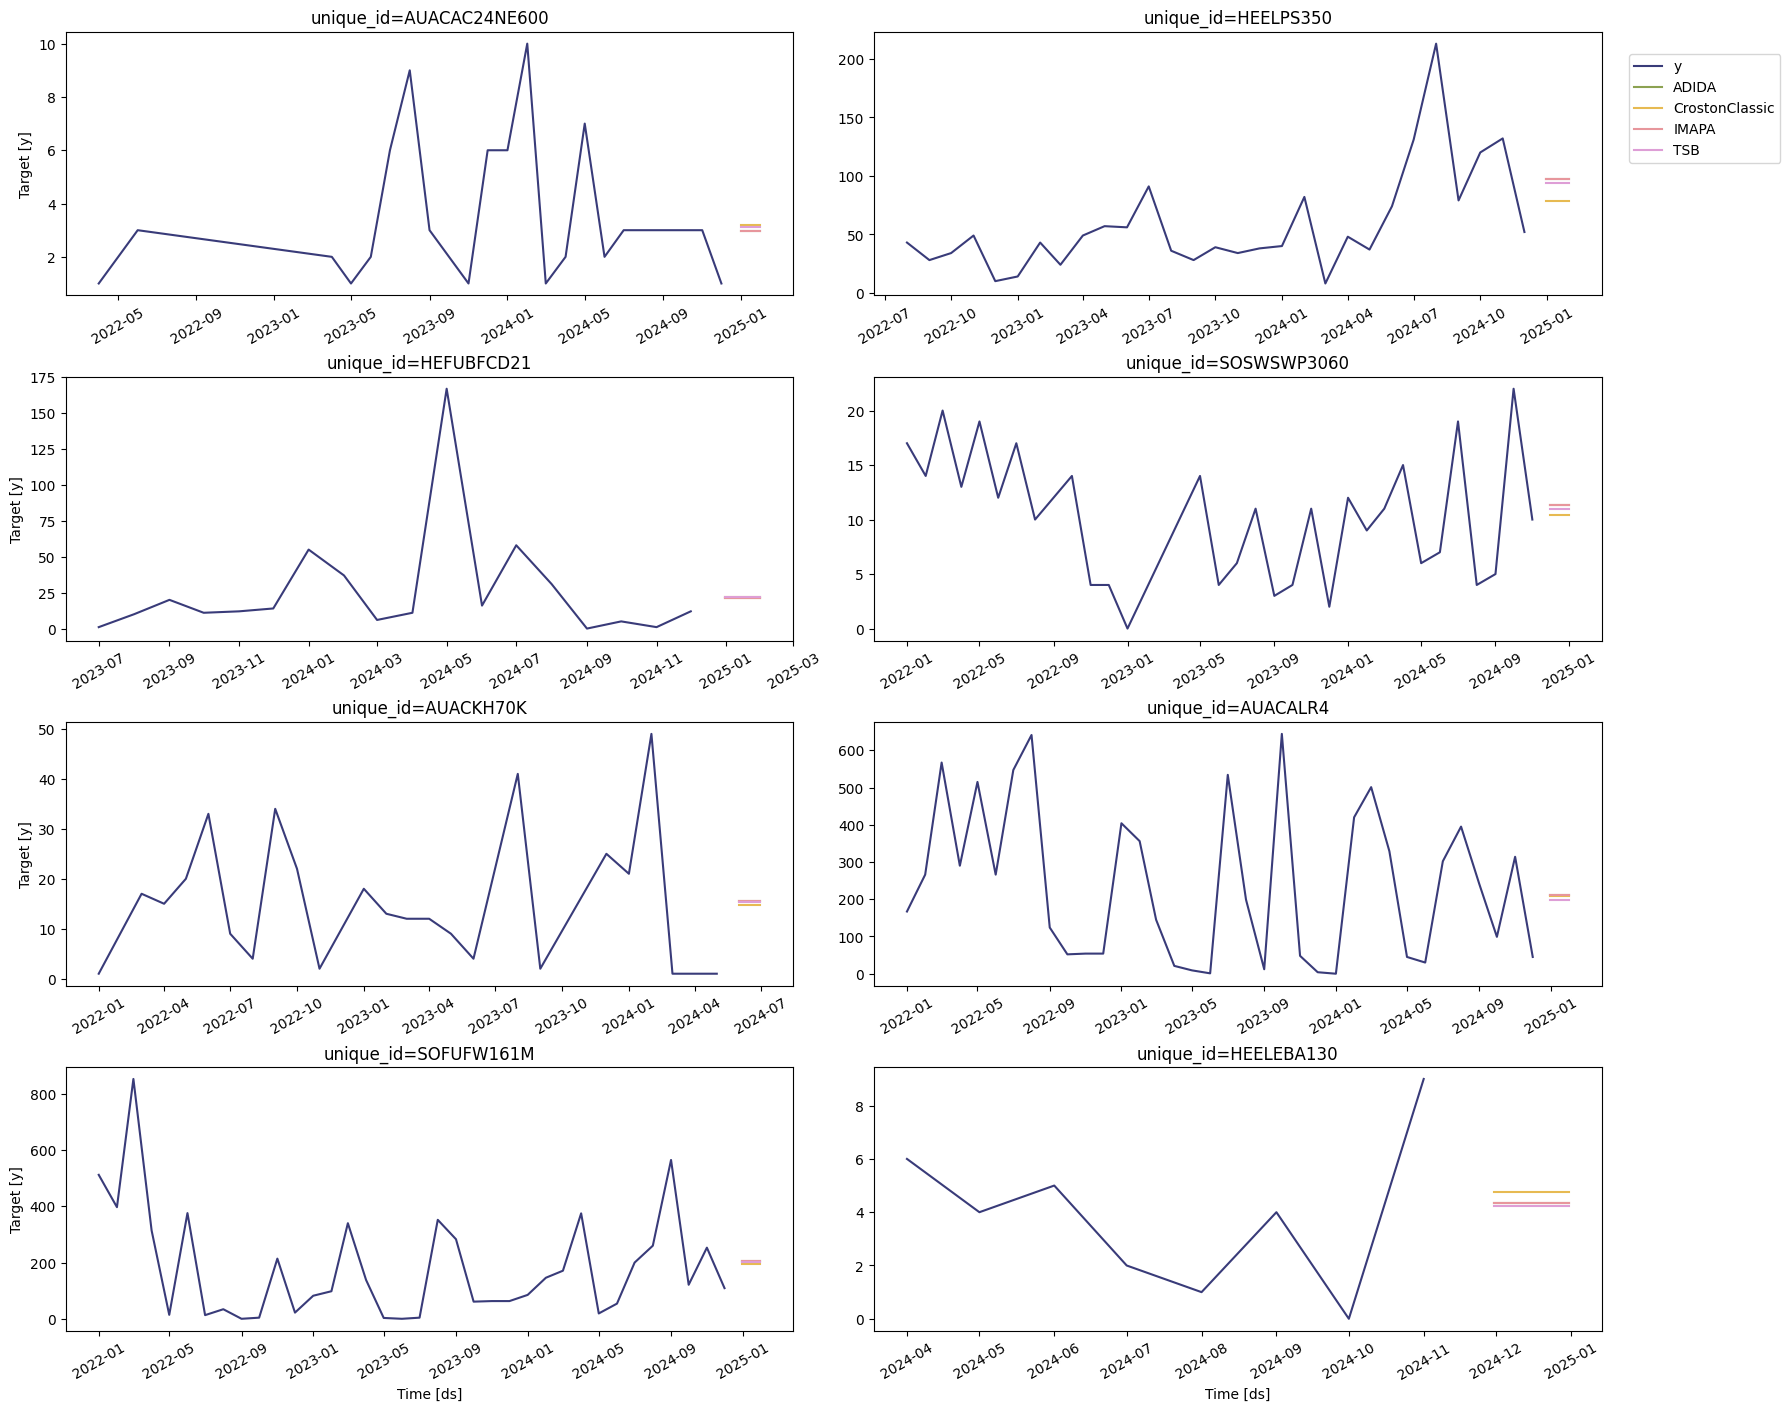

In [189]:
sf.plot(df_lower,fcst_dflow)

****

****

In [52]:
datas_low = pd.pivot_table(df_low, index=['date'], columns=['unique_id'], values=['y'])
print(datas_low)

                  y                                                       \
unique_id  AUAC4010 AUACAC24NE600 AUACAE15 AUACAF24Li AUACAF31C AUACALK4   
date                                                                       
2022-01-01      NaN           NaN      1.0        NaN       5.0      NaN   
2022-02-01      NaN           NaN      6.0        NaN       2.0      NaN   
2022-03-01      NaN           NaN      1.0        NaN       2.0      NaN   
2022-04-01      1.0           1.0      1.0        NaN       3.0      NaN   
2022-05-01     28.0           NaN     20.0        NaN       1.0      NaN   
2022-06-01     50.0           3.0     18.0        NaN       1.0      NaN   
2022-07-01      NaN           NaN      1.0        NaN       1.0      NaN   
2022-08-01      7.0           NaN      NaN        NaN       4.0      NaN   
2022-09-01      4.0           NaN      1.0        NaN      11.0      NaN   
2022-10-01      4.0           NaN     37.0        NaN       1.0      NaN   
2022-11-01  

In [31]:
datas_low = datas_low.reset_index(level="docdate", col_level=1)
datas_low

cantidad                                    \
codigo_articulo     docdate AUAC4010 AUACAC24NE600 AUACAE15 AUACAF24Li   
0                2022-01-04      NaN           NaN      NaN        NaN   
1                2022-01-05      NaN           NaN      NaN        NaN   
2                2022-01-06      NaN           NaN      NaN        NaN   
3                2022-01-11      NaN           NaN      NaN        NaN   
4                2022-01-12      NaN           NaN      NaN        NaN   
..                      ...      ...           ...      ...        ...   
809              2024-12-04      NaN           NaN      NaN        NaN   
810              2024-12-05      5.0           NaN      2.0        1.0   
811              2024-12-06      NaN           1.0      3.0       25.0   
812              2024-12-07      1.0           NaN      NaN        NaN   
813              2024-12-09      9.0           NaN      NaN       12.0   

                                                                    ...  \
codigo_articulo AUACAF31C AUACALK4 AUACAP40 AUACAR10SC901 AUACAT63  ...   
0                     1.0      NaN      NaN           NaN      NaN  ...   
1                     NaN      NaN      NaN           NaN      NaN  ...   
2                     NaN      NaN      NaN           NaN      NaN  ...   
3                     NaN      NaN      NaN           NaN      NaN  ...   
4                     NaN      NaN      NaN           NaN      NaN  ...   
..                    ...      ...      ...           ...      ...  ...   
809                   NaN      NaN      NaN           NaN      NaN  ...   
810                   NaN      NaN      NaN           NaN      NaN  ...   
811                   NaN      NaN      NaN           NaN      NaN  ...   
812                   NaN      NaN      NaN           NaN      NaN  ...   
813                   NaN      NaN      NaN           NaN      NaN  ...   

                                                                              \
codigo_articulo SOSWSWA2850 SOSWSWC1000 SOSWSWT2033 SOSWSWT2035 SOSWSWT3545A   
0                       NaN         NaN         NaN         NaN          NaN   
1                       NaN         NaN         NaN         NaN          NaN   
2                       NaN         NaN         NaN         NaN          NaN   
3                       NaN         1.0         NaN         NaN          NaN   
4                       NaN         1.0         NaN         NaN          NaN   
..                      ...         ...         ...         ...          ...   
809                     NaN         NaN         NaN         1.0          NaN   
810                     1.0         NaN         NaN         NaN          NaN   
811                     NaN         NaN         NaN         NaN          NaN   
812                     NaN         NaN         1.0         NaN          NaN   
813                     NaN         NaN         NaN         NaN          NaN   

                                                                                
codigo_articulo SOSWSWW2760 SOSWSWW3552 SOSWSWW4070MV SOSWSWW5070MV SOSWT1-112  
0                       NaN         NaN           NaN           NaN        NaN  
1                       NaN         NaN           NaN           NaN        NaN  
2                       NaN         NaN           NaN           NaN        NaN  
3                       NaN         NaN           NaN           NaN        NaN  
4                       NaN         NaN           NaN           NaN        NaN  
..                      ...         ...           ...           ...        ...  
809                     NaN         NaN           NaN           NaN        NaN  
810                     NaN         NaN           1.0           NaN        NaN  
811                     NaN         1.0           NaN           NaN        NaN  
812                     NaN         NaN           NaN           NaN        NaN  
813                     NaN         NaN           NaN           0.0        N

In [32]:
# Flatten the MultiIndex in columns
datas_low.columns = ['_'.join(filter(None, col)) if isinstance(col, tuple) else col for col in datas_low.columns]


In [33]:
datas_low.columns

Index(['docdate', 'cantidad_AUAC4010', 'cantidad_AUACAC24NE600',
       'cantidad_AUACAE15', 'cantidad_AUACAF24Li', 'cantidad_AUACAF31C',
       'cantidad_AUACALK4', 'cantidad_AUACAP40', 'cantidad_AUACAR10SC901',
       'cantidad_AUACAT63',
       ...
       'cantidad_SOSWSWA2850', 'cantidad_SOSWSWC1000', 'cantidad_SOSWSWT2033',
       'cantidad_SOSWSWT2035', 'cantidad_SOSWSWT3545A', 'cantidad_SOSWSWW2760',
       'cantidad_SOSWSWW3552', 'cantidad_SOSWSWW4070MV',
       'cantidad_SOSWSWW5070MV', 'cantidad_SOSWT1-112'],
      dtype='object', length=189)

In [106]:
dlowers = datas_low.copy()


In [107]:
dlowers = dlowers.fillna(0)
dlowers.tail(10)

,docdate,cantidad_AUAC4010,cantidad_AUACAC24NE600,cantidad_AUACAE15,cantidad_AUACAF24Li,cantidad_AUACAF31C,cantidad_AUACALK4,cantidad_AUACAP40,cantidad_AUACAR10SC901,cantidad_AUACAT63,...,cantidad_SOSWSWA2850,cantidad_SOSWSWC1000,cantidad_SOSWSWT2033,cantidad_SOSWSWT2035,cantidad_SOSWSWT3545A,cantidad_SOSWSWW2760,cantidad_SOSWSWW3552,cantidad_SOSWSWW4070MV,cantidad_SOSWSWW5070MV,cantidad_SOSWT1-112
804,2024-11-28,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
805,2024-11-29,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,2024-11-30,0.0,5.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
807,2024-12-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
808,2024-12-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
809,2024-12-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
810,2024-12-05,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
811,2024-12-06,0.0,1.0,3.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
812,2024-12-07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
813,2024-12-09,9.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
# monthly summarization 
dlowers['docdate'] = pd.to_datetime(dlowers['docdate'])
dlowers.set_index('docdate', inplace=True)

low_month = dlowers.resample('M').sum()
print(low_month)


            cantidad_AUAC4010  cantidad_AUACAC24NE600  cantidad_AUACAE15  \
docdate                                                                    
2022-01-31                0.0                     0.0                1.0   
2022-02-28                0.0                     0.0                6.0   
2022-03-31                0.0                     0.0                1.0   
2022-04-30                1.0                     1.0                1.0   
2022-05-31               28.0                     0.0               20.0   
2022-06-30               50.0                     3.0               18.0   
2022-07-31                0.0                     0.0                1.0   
2022-08-31                7.0                     0.0                0.0   
2022-09-30                4.0                     0.0                1.0   
2022-10-31                4.0                     0.0               37.0   
2022-11-30                5.0                     0.0                2.0   
2022-12-31  

/tmp/ipykernel_7190/1713616812.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  low_month = dlowers.resample('M').sum()


In [109]:
low_month = pd.DataFrame(low_month)
low_month


,cantidad_AUAC4010,cantidad_AUACAC24NE600,cantidad_AUACAE15,cantidad_AUACAF24Li,cantidad_AUACAF31C,cantidad_AUACALK4,cantidad_AUACAP40,cantidad_AUACAR10SC901,cantidad_AUACAT63,cantidad_AUACAVANTI6000Z,...,cantidad_SOSWSWA2850,cantidad_SOSWSWC1000,cantidad_SOSWSWT2033,cantidad_SOSWSWT2035,cantidad_SOSWSWT3545A,cantidad_SOSWSWW2760,cantidad_SOSWSWW3552,cantidad_SOSWSWW4070MV,cantidad_SOSWSWW5070MV,cantidad_SOSWT1-112
docdate,,,,,,,,,,,,,,,,,,,,,
2022-01-31,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-28,0.0,0.0,6.0,0.0,2.0,0.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
2022-03-31,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,8.0,0.0,...,0.0,3.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-30,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-31,28.0,0.0,20.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,...,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-06-30,50.0,3.0,18.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,...,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-07-31,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-08-31,7.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,6.0,0.0,...,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-30,4.0,0.0,1.0,0.0,11.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
import xgboost as xgb

X = d4010[["days_since_start"]]
y = d4010["cantidad_AUAC4010"]

# Train XGBoost
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100).fit(X, y)

# Predict future
future_days = pd.DataFrame({"days_since_start": [1071, 1073, 1076, 1078, 1080, 1082, 1084, 1086]})
predictions = model.predict(future_days)
print(predictions)

In [34]:


d10 = datas_low[['docdate', 'cantidad_AUAC4010']]
d4010 = pd.DataFrame(d10)
d4010["docdate"] = pd.to_datetime(d4010["docdate"])
d4010["days_since_start"] = (d4010["docdate"] - d4010["docdate"].min()).dt.days

d4010

,docdate,cantidad_AUAC4010,days_since_start
0,2022-01-04,NaN,0
1,2022-01-05,NaN,1
2,2022-01-06,NaN,2
3,2022-01-11,NaN,7
4,2022-01-12,NaN,8
...,...,...,...
809,2024-12-04,NaN,1065
810,2024-12-05,5.0,1066
811,2024-12-06,NaN,1067
812,2024-12-07,1.0,1068


In [35]:
d4010 = d4010.fillna(0)
d4010

,docdate,cantidad_AUAC4010,days_since_start
0,2022-01-04,0.0,0
1,2022-01-05,0.0,1
2,2022-01-06,0.0,2
3,2022-01-11,0.0,7
4,2022-01-12,0.0,8
...,...,...,...
809,2024-12-04,0.0,1065
810,2024-12-05,5.0,1066
811,2024-12-06,0.0,1067
812,2024-12-07,1.0,1068


In [37]:
import xgboost as xgb

X = d4010[["days_since_start"]]
y = d4010["cantidad_AUAC4010"]

# Train XGBoost
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100).fit(X, y)

# Predict future
future_days = pd.DataFrame({"days_since_start": [1072, 1074, 1076]})
predictions = model.predict(future_days)
print(predictions)

[8.968458 8.968458 8.968458]


In [ ]:
import xgboost as xgb
models = []
X = dlowers[["days_since_start"]]

for col in dlowers.columns:
    model= xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
    model.fit(X, dlowers[col])
    models.append((model, col))

# Predict future
future_days = pd.DataFrame({"days_since_start": [1071, 1073, 1076, 1078, 1080, 1082, 1084, 1086]}) 

# generate predictions for each feature
predictions = {}
for model, col in models:
    predictions[col] = model.predict(future_days)


print(predictions)


pd.DataFrame.from_dict(predictions, orient='index')